EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column    

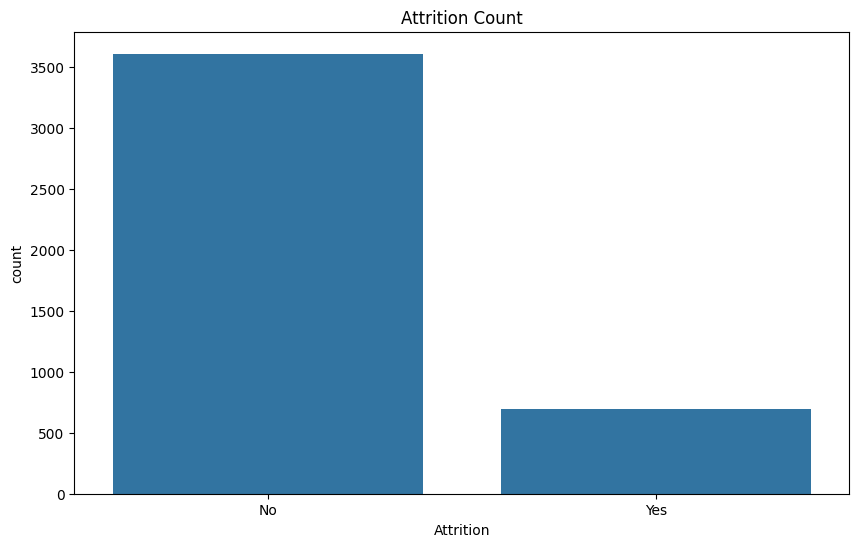

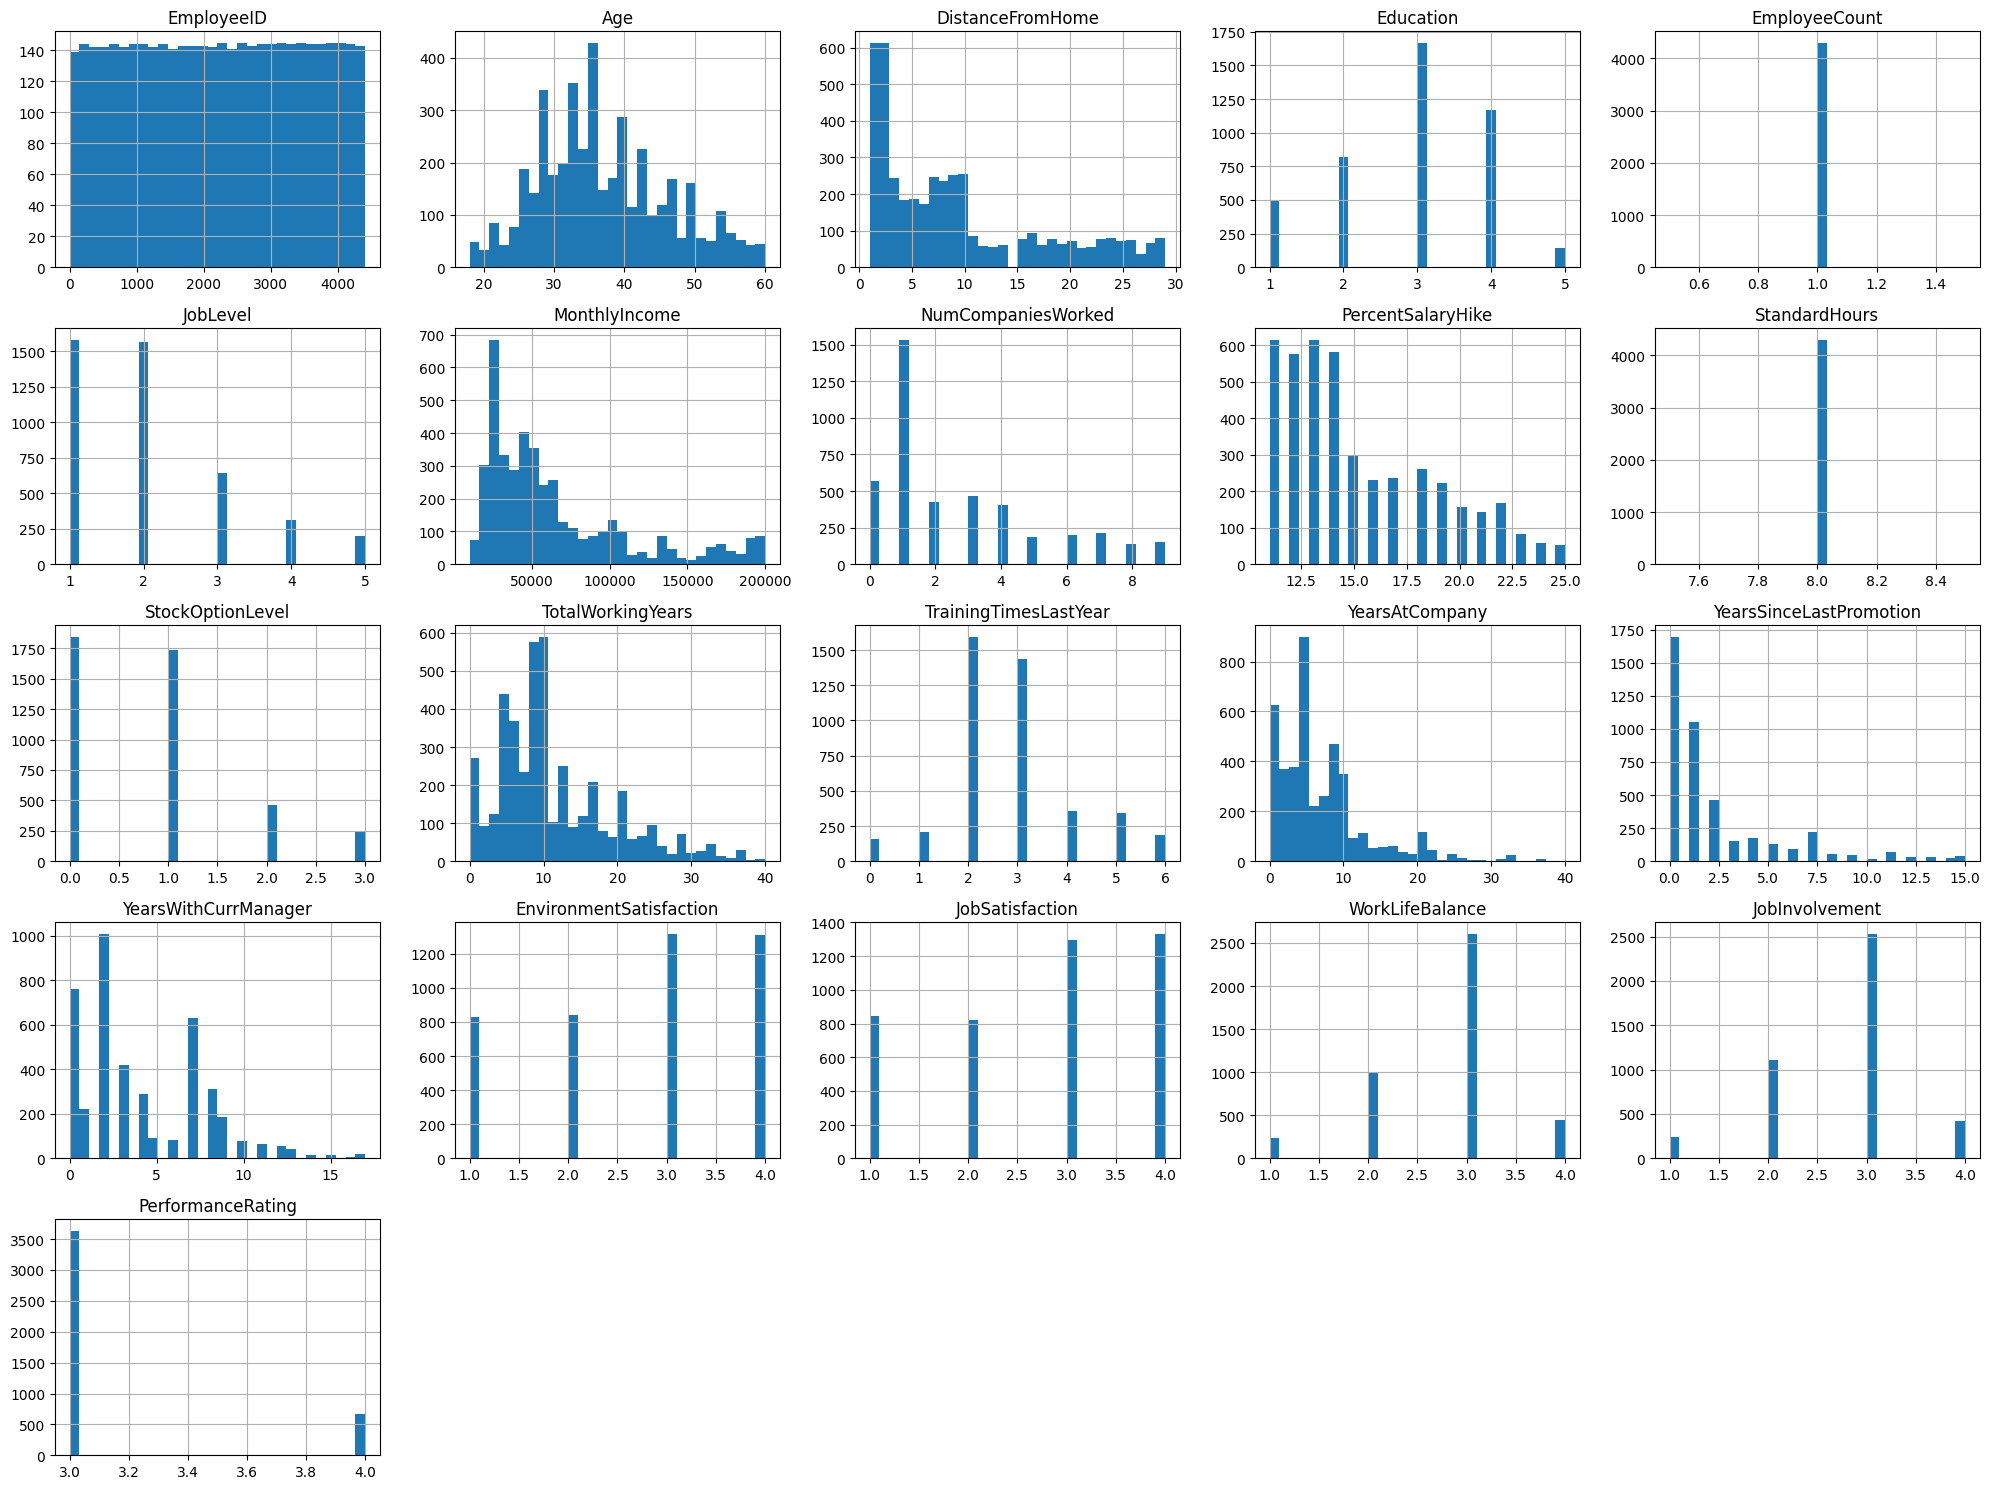

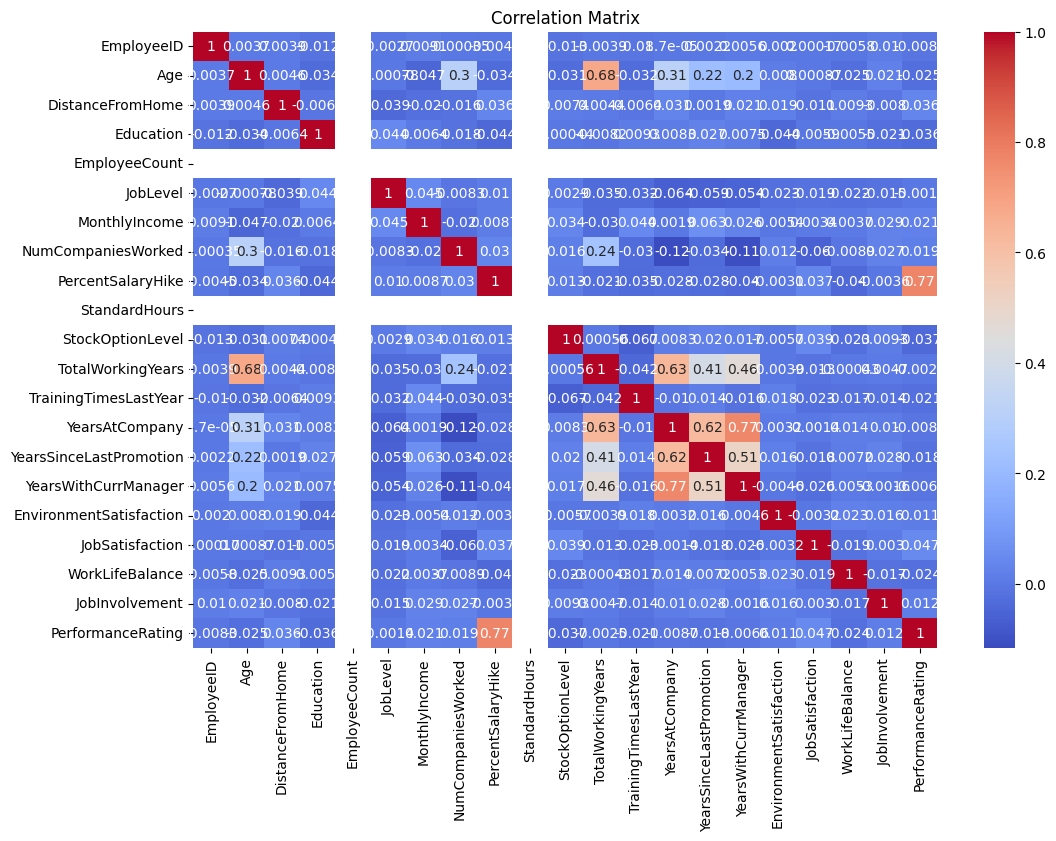

Accuracy: 0.9941860465116279
Confusion Matrix:
 [[717   0]
 [  5 138]]
Classification Report:
               precision    recall  f1-score   support

          No       0.99      1.00      1.00       717
         Yes       1.00      0.97      0.98       143

    accuracy                           0.99       860
   macro avg       1.00      0.98      0.99       860
weighted avg       0.99      0.99      0.99       860



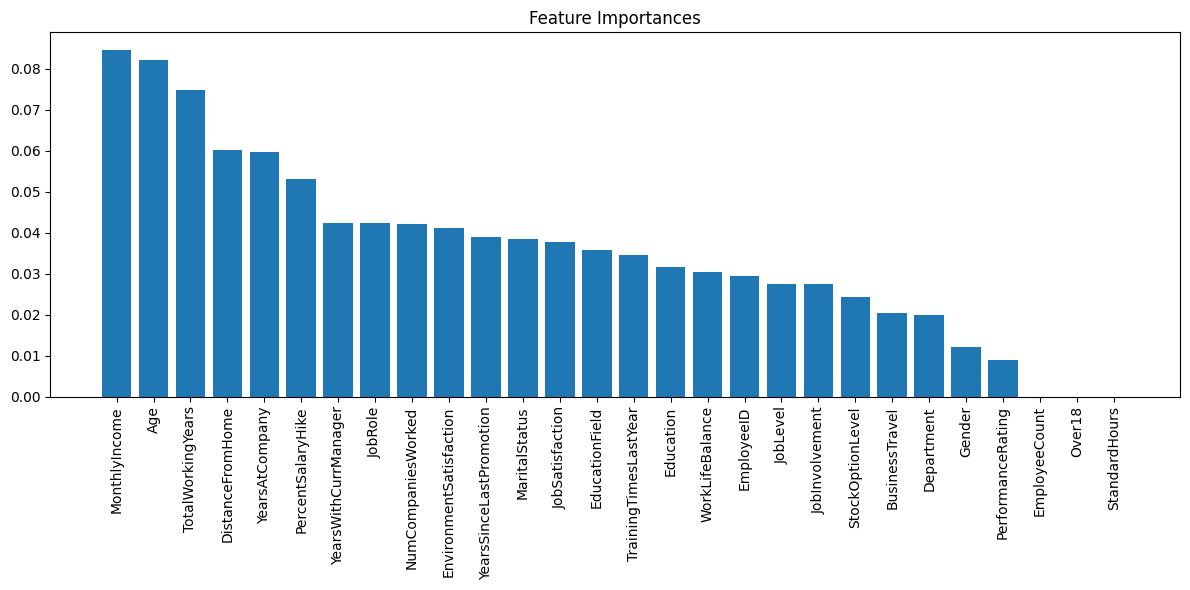

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv(r'/content/sample_data/Attrition data.csv')

print(data.isnull().sum())
data = data.dropna()
data.info()

plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Count')
plt.show()

data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

numerical_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

fig = px.scatter(data, x='MonthlyIncome', y='YearsAtCompany', color='Attrition', title='Monthly Income vs. Years at Company')
fig.show()

X = data.drop('Attrition', axis=1)
y = data['Attrition']

label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

fig.write_html("scatter_plot.html")